<a href="https://colab.research.google.com/github/vale314/GLAMUR-IA/blob/main/GLAMUR03(BIG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Realizamos un modelo denso exhaustivo

Para realizar este modelo iremos directo a la realizacion del modelo, preprocesamiento y evaluación del modelo, para comprender los datos revisar el archivo glamur01.ipynb

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils 
import random

In [15]:
# Import the data from keras.dataset

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [21]:
# Son las 10 clases con las que contamos en el modelo
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
# Normalize the input image so that each pixel value is between 0 to 1.

train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
model = tf.keras.models.load_model('newModel.h5')

#MODELO

Modelo referenciado e inspirado de https://medium.com/@mjbhobe/classifying-fashion-with-a-keras-cnn-achieving-94-accuracy-part-1-1ffcb7e5f61a

In [12]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),   
        
        Flatten(),
        
        Dense(1024, activation='relu'),
        
        Dense(512, activation='relu'),
        
        Dense(10, activation='softmax')
    ])

adam = Adam(lr=0.0001, decay=1e-6)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 batch_normalization_19 (Bat  (None, 26, 26, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                      

In [15]:
model.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
938/938 [==============================] - 700s 744ms/step - loss: 0.4050 - accuracy: 0.8532
Epoch 2/20
938/938 [==============================] - 701s 747ms/step - loss: 0.2428 - accuracy: 0.9099
Epoch 3/20
938/938 [==============================] - 698s 745ms/step - loss: 0.1831 - accuracy: 0.9329
Epoch 4/20
938/938 [==============================] - 700s 746ms/step - loss: 0.1391 - accuracy: 0.9495
Epoch 5/20
938/938 [==============================] - 701s 748ms/step - loss: 0.1070 - accuracy: 0.9595
Epoch 6/20
938/938 [==============================] - 702s 748ms/step - loss: 0.0819 - accuracy: 0.9698
Epoch 7/20
938/938 [==============================] - 704s 750ms/step - loss: 0.0648 - accuracy: 0.9768
Epoch 8/20
938/938 [==============================] - 708s 755ms/step - loss: 0.0548 - accuracy: 0.9801
Epoch 9/20
938/938 [==============================] - 706s 753ms/step - loss: 0.0435 - accuracy: 0.9842
Epoch 10/20
938/938 [==============================] - 700s 746m

In [18]:
model.save("newModel.h5")

#Evaluacion del modelo

In [18]:
# Evaluar el modelo con las imagenes de test_images

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 33s 103ms/step - loss: 0.4332 - accuracy: 0.9186
Test accuracy: 0.9186000227928162


In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

NameError: ignored

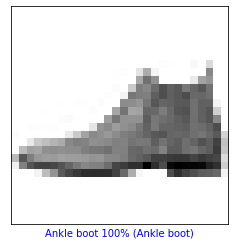

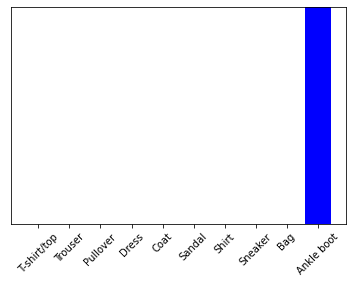

In [22]:
predictions = model.predict(test_images)
index = 0
utils.plot_image_and_prob(predictions, test_labels, test_images, i=index, big=True, class_names=class_names)

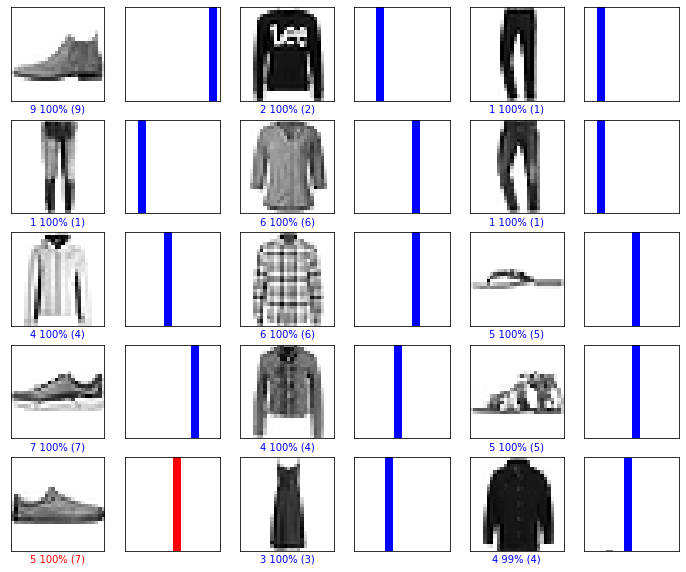

In [23]:
utils.plot_multi_images_prob(predictions, test_labels, test_images)

Confusion Matrix

Confusion matrix


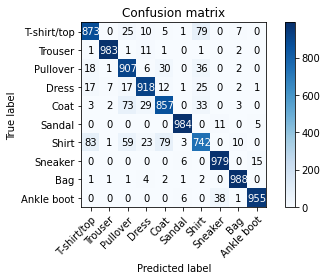

In [24]:
# Como siempre - vamos a convertir la matriz de probabilidades en clases
predicted_classes = utils.label_with_highest_prob(predictions)

# Graficar la matriz
utils.plot_confusion_matrix(y_pred=predicted_classes, y_true=test_labels, classes=np.array(class_names))

#Evaluamos dentro de un rango si evalua correctamente

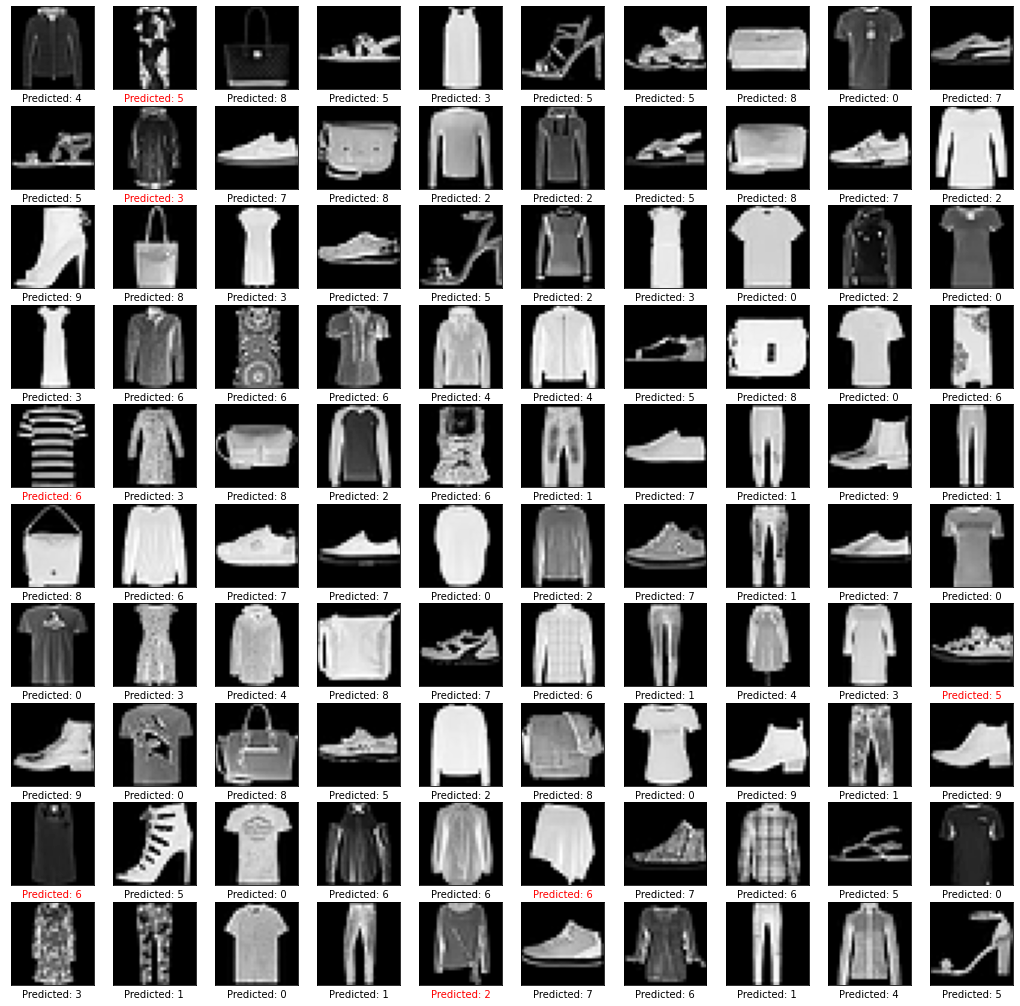

In [25]:
# Una función auxiliar que devuelve 'rojo'/'negro' dependiendo de si son dos entradas
# parámetro coincide o no.

def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Prediga las etiquetas de las imágenes de dígitos en nuestro conjunto de datos de prueba.

predictions = model.predict(test_images)

# Como la salida del modelo, 10 flotantes que representan la probabilidad de la imagen de entrada
# siendo un dígito del 0 al 9, necesitamos encontrar el mayor valor de probabilidad
# para averiguar qué dígito predice el modelo como más probable en la imagen.

prediction_digits = np.argmax(predictions, axis=1)

# Luego trace 100 imágenes de prueba aleatorias y sus etiquetas predichas.
# Si el resultado de una predicción es diferente de la etiqueta proporcionada en "prueba"
# conjunto de datos, lo resaltaremos en color rojo.

plt.figure(figsize=(18, 18))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_index = random.randint(0, len(prediction_digits))
  plt.imshow(test_images[image_index], cmap=plt.cm.gray)
  ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                           test_labels[image_index]))
  plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()


#Utilizando el modelo con nuestros datos

In [28]:
from google.colab import files
uploaded = files.upload()

image_name = ""

for key in uploaded.keys():
  image_name = key;

# painting=plt.imread(image_name)
# print(painting.shape)

Saving 1.jpg to 1.jpg


In [26]:
# !curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
# import cv2
# from google.colab.patches import cv2_imshow

# img = cv2.imread('1.jpg',0)

# # img = cv2.resize(img,(28,28))

# # img = img / 255.0

# painting=plt.imread("result.jpg")
# datas = painting / 255.0

# datas = img / 255.0

# print(img.shape)
# print(img)

# # cv2_imshow(img)
# plt.imshow(datas)

In [29]:
from PIL import Image 
import PIL.ImageOps 
### Cambiamos a blanco y negro la imagen 1 capa
image_file = Image.open(image_name) 
image_file = image_file.convert('1')
image_file.save('result.jpg')

### Se invierten los colores
image = Image.open('result.jpg')
image_file = PIL.ImageOps.invert(image)
image_file.save('result.jpg')

### Se normaliza la imagen
painting=plt.imread("result.jpg")
datas = painting / 255.0

1.jpg

In [30]:
arr = np.array([datas, datas])

pre = model.predict(arr)

prediction_digits = np.argmax(pre, axis=1)

# print (prediction_digits[0])

print("Numero en clase: " + str(prediction_digits[0]) + "    Nombre de clase: " + str(class_names[prediction_digits[0]]))

Numero en clase: 5    Nombre de clase: Sandal
